In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Classified Data' ,index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
y = df['TARGET CLASS']
x = df.drop('TARGET CLASS', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split\
(x,y,test_size=0.2, random_state=111)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [9]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
predictions = knn.predict(x_test)

In [11]:
from sklearn.metrics import classification_report

In [12]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        97
           1       0.93      0.91      0.92       103

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [16]:
x = scaler.fit_transform(x)

In [17]:
x_train, x_test,y_train, y_test = train_test_split\
(x,y,test_size=0.2,random_state=777)

In [18]:
accs = []
for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    acc = knn.score(x_test, y_test)
    accs.append(acc)

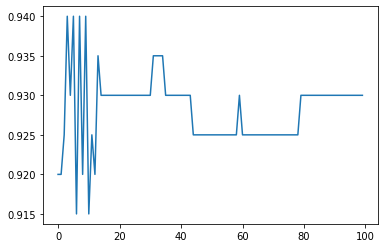

In [19]:
plt.plot(range(len(accs)), accs)

In [20]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
preds = knn.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        93
           1       0.94      0.95      0.94       107

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.94

In [24]:
knn.score(x_test, y_test)

0.94